# Facebook Graph API<span style="color:blue"> | Explorer</span>
## 初探 臉書社群圖譜

[Facebook Graph API Explorer](https://developers.facebook.com/tools/explorer)
+ you need a Facebook account that can login to get a valid **access token**
+ Graph API's token is short-lived (expired in hours) and can be refreshed on the page

## components of the API
<span style="font-size:30pt">nodes | edges | fields</span>
+ **nodes** - basically *objects* such as a User, a Photo, a Page, a Comment.
+ **edges** - the *connections* between those "things", such as a Page's Photos, or a Photo's Comments
+ **fields** - info about nodes, such as the birthday of a User, or the name of a Page

## basic syntax 基本查詢語法
<span style="font-size:30pt;color:blue">/&lt;node_id&gt;/&lt;edge_name&gt;?fields=f1,f2,...</span>
+ a node can be a person, a photo, a page, ...
    + different nodes have their corresponding fields
+ the special `me` node resolves to current token owner

example: 

<span style="font-size:20pt">me/photos?fields=from</span>

## which field? 有哪些欄位？
+ not all fields will be returned in an API call
+ use <span style="font-size:20pt">metadata=1</span> to extract all possible fields on a node
    + example: **me?metadata=1**
+ alternatively, use the interactive "Search for a field" GUI tool to the left panel on the api explorer

## nested query 多層查詢
+ solution 1: 
    + `<node_id>?fields=f1{subf1,subf2,...},f2,...`
    + example: **me?fields=photos{from,id}**
+ solution 2: (recommended) 
    + `<node_id>?fields=f1.fields(subf1,subf2,...),f2,...`
    + example: **me?fields=photos.fields(from,id)**
+ no limit on the depth of nesting

## node or edge? 結點或連線？
+ edge is the *population*, node is talking about *individual*
+ *all* of my photos => edge (no id); *this* photo of mine => node (with id)
+ fields are defined on nodes, not edges
+ any difference?
    + `me?fields=photos{from}`
    + `me/photos?fields=from`

## modifier 查詢修飾語
### limit 限制回傳數
+ optionally, use method `.limit(n)` or `?limit=n` to restrict the number of objects returned
    + on a field:
        + `me?fields=photos.limit(10)`
    + on an edge:
        + `me/photos?limit=10`

### summary 計算總量
+ fields (or edges) with multiple entities usually have a summary containing their counts
    + on a field:
        + `<photo_id>?fields=likes.summary(true)`
    + on an edge:
        + `<photo_id>/likes?summary=true`

## chaining 修飾語鏈結
+ on a field:
    + `<photo_id>?files=likes.limit(1).summary(true)`
+ on an edge:
    + `<photo_id>/likes?limit=1&summary=true`

## paging 分頁
obviously, not all results are returned in one shut (by design)

## scenario: who likes my posts?
## 揪竟，是誰在按我的文章讚？

1. 從me結點出發
+ 在me節點的文章有哪些？
    + 以連結語法查詢：`me/posts`
    + 或者以欄位語法查詢：`me?fields=posts`
+ 一篇文章有哪些欄位？
    + 先隨便挑一篇文章當作新查詢的起點，使用`?metadata=1`來觀察
    + 按讚數是欄位還是連結？
+ 使用since修飾語來做時間區間的限制
    + [timestamp converter](http://www.epochconverter.com)
+ 使用summary修飾語取得按讚的總數
+ 參考答案：
    + `me/posts?fields=likes.fields(name).summary(true)&since=1420070400&limit=100`

## other syntax 貼文, 留言, 與刪除

# Facebook Graph API<span style="color:blue"> | Programmatic</span>
## 程式化圖譜爬蟲

## go beyond the API explorer...
## 每一個查詢，其實都是一個HTTP request
+ an API query is nothing more than a HTTP request
    + with valid access_token
    + and the returned data are always **json**
+ use the **Get Code** button in the explorer and look for the **cURL** tab

<img src="img/getcode-button.png">

```
curl -i -X GET \
 "https://graph.facebook.com/v2.4/me?fields=context&access_token=CAACEdEose0cBAL34H6NiMZB3ZCnPaZBnShQoSY9GZCh81kDLbQZArxKGEPY981H7KfBUjG99jThga2OxQ7owu03IZCgoEcjMDmVSyeZAzos3JZBvWEzbRbfX0DZAl0Au2ybbbZCNZBOsZCYGmjKqCLyTHftwrnOerU07Pismb3QBxYommKEo7oGsWTIIREpbKu4VlHMJY7Q7ZBY00aAZDZD"
```

## get all metadata of the me node
## 練習：撈回me節點的所有可用欄位名稱
-------------------------------------------------

### 步驟一：載入requests套件

In [42]:
import requests

### 步驟二：觀察Explorer的查詢結果

+ 查詢：`me?metadata=1`
+ 用`Get Code`按鈕觀察cURL的程式碼（類似下面）

```
curl -i -X GET \
 "https://graph.facebook.com/v2.4/me?metadata=1&access_token=CAACEdEose0cBAJzoEpPQfyhYg1YCDauTpjUsPXPhryjrnDO0ZCkjNrw74dDraVZByB0wGCWXs5zZB21UkRf5ZCFss1lzTiPUNZBJCdrwgMvFTi2feej1FcE9vpfErOd6F1lykYlZA8vQc8CZAOQC98bQxnM0Ed7eZBVMjT41buHTHSZCGBkZCfl2EzbRiZCJpXcewpgrRDZAFStTDAZDZD"
 ```

### 步驟三：拼出API Call (HTTP request) 內容字串

In [44]:
# the target API url
api_addr = "https://graph.facebook.com/v2.4/me"

# a valid token
token = "CAACEdEose0cBAEZAjeBtClmJ0ZAtPDGs1iLav0QUPLofXFGLkCWZAUf0hNUZBQr8cnxOsAg8PGsjlcmglGilGTQgfweUOhboycjVr95itFlmskTPhBYBUBZCZAU1yiPuTDyyvdS7vEVrZAPDa1fSxZBMZA4eL8YvthC6Yk115ZARLufW5nEXI30tnUc3b43P47cu6kJWizviDulwZDZD"

# build the query string for the GET method
qs = {"metadata": 1, 
      "access_token": token}


### 步驟四：發出GET連線

In [45]:
r = requests.get(api_addr, params=qs)

### 步驟五：確認連線結果

In [46]:
print r
r.close()
r.content[:100] # content too long, print only the first 100 char

<Response [200]>


'{"name":"Yueh Hsuan Chung","metadata":{"fields":[{"name":"id","description":"The id of this person\'s'

### 步驟六：解析結果

In [47]:
# parse json string into dict
meta = r.json()

# check top-level keys in parsed results
meta.keys()

[u'id', u'name', u'metadata']

In [48]:
# show metadata dict
meta["metadata"].keys()

[u'connections', u'fields', u'type']

In [49]:
# inspect the value of fields in metadata
meta["metadata"]["fields"][:3] # a list of dict

[{u'description': u"The id of this person's user account. This ID is unique to each app and cannot be used across different apps. [Our upgrade guide provides more information about app-specific IDs](/docs/apps/upgrading/#upgrading_v2_0_user_ids)",
  u'name': u'id',
  u'type': u'numeric string'},
 {u'description': u"The About Me section of this person's profile",
  u'name': u'about',
  u'type': u'string'},
 {u'description': u'The age segment for this person expressed as a minimum and maximum age. For example, more than 18, less than 21.',
  u'name': u'age_range',
  u'type': u'agerange'}]

In [50]:
metafields = [ l["name"] for l in meta["metadata"]["fields"] ]
for s in metafields:
    print s

id
about
age_range
bio
birthday
context
currency
devices
education
email
favorite_athletes
favorite_teams
first_name
gender
hometown
inspirational_people
install_type
installed
interested_in
is_shared_login
is_verified
languages
last_name
link
location
locale
meeting_for
middle_name
name
name_format
payment_pricepoints
test_group
political
relationship_status
religion
security_settings
significant_other
sports
quotes
third_party_id
timezone
token_for_business
updated_time
shared_login_upgrade_required_by
verified
video_upload_limits
viewer_can_send_gift
website
work
public_key
cover


## traverse paginated json
## 練習：一次撈回所有被分頁的內容
-------------------------------------------
以一篇文章的按讚者清單為例

### 步驟一：觀察Explorer的查詢結果

1. 隨編選一篇你的文章
    + 可以用`me/posts`的查詢結果來挑！
+ 查詢文章的按讚資訊
    + solution 1: `/<post_id>/likes`
    + solution 2: `/<post_id>?fieds=likes`
+ 觀察重點：
    + 如果該文章一個讚都沒有？
    + 如果該文章的讚數不夠被分頁？
    + 如果被分頁了？
    + 分到最後一頁的時候長什麼樣？
+ 用`Get Code`按鈕觀察cURL的程式碼（類似下面）

```
curl -i -X GET \
 "https://graph.facebook.com/v2.4/100000862115668_932029203502475/likes?access_token=CAACEdEose0cBAJzoEpPQfyhYg1YCDauTpjUsPXPhryjrnDO0ZCkjNrw74dDraVZByB0wGCWXs5zZB21UkRf5ZCFss1lzTiPUNZBJCdrwgMvFTi2feej1FcE9vpfErOd6F1lykYlZA8vQc8CZAOQC98bQxnM0Ed7eZBVMjT41buHTHSZCGBkZCfl2EzbRiZCJpXcewpgrRDZAFStTDAZDZD" 
 ```

### 重要的觀察結果
+ 如果該文章一個讚都沒有？
    + 小技巧：運用`me/posts?fields=likes.limit(1).summary(true)`這個查詢來快速找出你沒有讚數的文章
    + 結果：
<img src="img/no-like.png">
+ 如果該文章的讚數不夠被分頁？
    + 結果：
<img src="img/little-likes.png">
+ 如果被分頁了？
    + 結果：
<img src="img/more-likes.png">
+ 分到最後一夜的時候長什麼樣？
    + 結果：
<img src="img/final-likes.png">

### 步驟二：根據觀察結果制定程式邏輯

In [54]:
def getAllLikes1(token, node):
    result = []
    api_addr = "https://graph.facebook.com/v2.4/%s/likes" % node
    qs = {"fields": "name", 
          "access_token": token}
    r = requests.get(api_addr, params=qs)
    res = r.json()
    if not len(res["data"]):
        return result
    else:
        result += res["data"]
        while "next" in res["paging"]:
            cursor_next = res["paging"]["cursors"]["after"]
            qs["after"] = cursor_next
            r = requests.get(api_addr, params=qs)
            res = r.json()
            result += res["data"]
        return result

def getAllLikes2(token, node):
    result = []
    api_addr = "https://graph.facebook.com/v2.4/%s/likes" % node
    qs = {"fields": "name", 
          "access_token": token}
    r = requests.get(api_addr, params=qs)
    res = r.json()
    if not len(res["data"]):
        return result
    else:
        result += res["data"]
        while "next" in res["paging"]:
            next_query = res["paging"]["next"]
            r = requests.get(next_query)
            res = r.json()
            result += res["data"]
        return result

In [55]:
token = "CAACEdEose0cBAEZAjeBtClmJ0ZAtPDGs1iLav0QUPLofXFGLkCWZAUf0hNUZBQr8cnxOsAg8PGsjlcmglGilGTQgfweUOhboycjVr95itFlmskTPhBYBUBZCZAU1yiPuTDyyvdS7vEVrZAPDa1fSxZBMZA4eL8YvthC6Yk115ZARLufW5nEXI30tnUc3b43P47cu6kJWizviDulwZDZD"
node = "100000862115668_932029203502475"
result1 = getAllLikes1(token=token, node=node)
result2 = getAllLikes2(token=token, node=node)
result1 == result2

True

### 步驟三：驗收結果

In [56]:
# the result is a list of dict containing liked-users' id and name
result1[:6]

[{u'id': u'315371435293768', u'name': u'Tindy Cheng'},
 {u'id': u'969673423047100', u'name': u'ChunKuei Chu'},
 {u'id': u'756609997705112', u'name': u'\u6797\u744b\u744b'},
 {u'id': u'852448504770317', u'name': u'Mark Yang'},
 {u'id': u'1487000218', u'name': u'\u8607\u4e2d\u624d'},
 {u'id': u'1161704643846945', u'name': u'\u9673\u667a\u6cd3'}]

## scenario: all about likes...
## 出來吧～那些按我讚的人！

#### spec:
+ 給定一個使用者，一段時間：
    + 畫出該使用者所有文章的被按讚數時間線圖
    + 根據不同的按讚者畫出個別的按讚數時間線圖

### 步驟一：先用Explorer觀察想撈的資料模樣

`me/posts?fields=created_time,likes.fields(id,name)&since=1420070400`

### 步驟二：思考需要的功能

In [ ]:
# think about a blueprint of your crawler
class likerCrawler:
    # need a user id and a starting time
    def __init__(self, user, since, token): 
        self.user = str(user)
        self.since = str(since)
        self.token = str(token)
        
    # need a helper to convert datetime string to timestamp
    def str2Timestamp(): pass
    
    # need a function to crawl all post id in a given time
    def getPostId(): pass
    
    # need a function to crawl all like info given a post id
    def getLikes(): pass

### 步驟三：根據觀察結果，實作需要的功能

In [57]:
import requests
import datetime, time

class likerCrawler:
    """a FB Graph API crawler to get all like info associated with posts since a given time"""
    def __init__(self, user, since, token, tfmt="%Y-%m-%d"): 
        self.user = str(user)
        self.since = str(since)
        self.token = str(token)
        self.tfmt = str(tfmt)
        
    def getTimestamp(self):
        """convert datetime string to UNIX timestamp"""
        return int(time.mktime(datetime.datetime.strptime(self.since, self.tfmt).timetuple()))
        
    def getPostIdwithTimestamp(self): 
        """given user_id and start time, return a list of {post_id, time}"""
        posts = []
        api_addr = "https://graph.facebook.com/v2.4/%s/posts" % self.user
        qs = {"since": self.getTimestamp(), "access_token": self.token}
        res = requests.get(api_addr, params=qs).json()
        if not len(res["data"]):
            return None
        else: 
            posts += [ {"id": d["id"], "ts": d["created_time"]} for d in res["data"] ]
            while "paging" in res and next in res["paging"]:
                res = requests.get(res["paging"]["next"]).json()
                post_ids += [ {"id": d["id"], "ts": d["created_time"]} for d in res["data"] ]
            return posts

    def getLikesPerPost(self, post_id):
        """given a post id, return all user id/name liked it with timestamp"""
        like_users = []
        api_addr = "https://graph.facebook.com/v2.4/%s" % post_id
        qs = {"fields": "likes.fields(name),created_time", "access_token": self.token}
        res = requests.get(api_addr, params=qs).json()
        if "likes" not in res:
            return None
        else:
            ts = res["created_time"]
            like_users += res["likes"]["data"]
            while "paging" in res and "next" in res["paging"]:
                res = requests.get(next).json()
                like_users += res["data"]
            return ts, like_users
        
    def getAllLikes(self):
        all_likes = [ self.getLikesPerPost(d) for d in self.all_posts ]
        return [ l for l in all_likes if l is not None]
    
    @property
    def all_posts(self):
        return [ m["id"] for m in self.getPostIdwithTimestamp() ]

### 步驟四：驗收結果

In [58]:
mycrawler = likerCrawler(user="me",
                         since="2014-01-01",
                         token="CAACEdEose0cBAEZAjeBtClmJ0ZAtPDGs1iLav0QUPLofXFGLkCWZAUf0hNUZBQr8cnxOsAg8PGsjlcmglGilGTQgfweUOhboycjVr95itFlmskTPhBYBUBZCZAU1yiPuTDyyvdS7vEVrZAPDa1fSxZBMZA4eL8YvthC6Yk115ZARLufW5nEXI30tnUc3b43P47cu6kJWizviDulwZDZD")

In [59]:
# return all post ids
mycrawler.getTimestamp()

1388505600

In [60]:
# return all post ids with timestamp
mycrawler.getPostIdwithTimestamp()[:6]

[{'id': u'100000862115668_932029203502475', 'ts': u'2015-04-19T21:12:21+0000'},
 {'id': u'100000862115668_930976326941096', 'ts': u'2015-04-18T03:50:24+0000'},
 {'id': u'100000862115668_930036487035080', 'ts': u'2015-04-17T04:59:26+0000'},
 {'id': u'100000862115668_929925230379539', 'ts': u'2015-04-16T04:26:26+0000'},
 {'id': u'100000862115668_929794627059266', 'ts': u'2015-04-15T20:29:36+0000'},
 {'id': u'100000862115668_929511450420917', 'ts': u'2015-04-15T05:25:38+0000'}]

In [61]:
# return all post ids only
mycrawler.all_posts[:6]

[u'100000862115668_932029203502475',
 u'100000862115668_930976326941096',
 u'100000862115668_930036487035080',
 u'100000862115668_929925230379539',
 u'100000862115668_929794627059266',
 u'100000862115668_929511450420917']

In [62]:
# get all likers given a post_id
mycrawler.getLikesPerPost("100000862115668_932029203502475")

(u'2015-04-19T21:12:21+0000',
 [{u'id': u'315371435293768', u'name': u'Tindy Cheng'},
  {u'id': u'969673423047100', u'name': u'ChunKuei Chu'},
  {u'id': u'756609997705112', u'name': u'\u6797\u744b\u744b'},
  {u'id': u'852448504770317', u'name': u'Mark Yang'},
  {u'id': u'1487000218', u'name': u'\u8607\u4e2d\u624d'},
  {u'id': u'1161704643846945', u'name': u'\u9673\u667a\u6cd3'},
  {u'id': u'10204030571792411', u'name': u'Mansun Kuo'},
  {u'id': u'10152783776360960', u'name': u'Jim Pai'},
  {u'id': u'748835111857876', u'name': u'Yi LinWei'},
  {u'id': u'788499557828349', u'name': u'Wush Wu'},
  {u'id': u'10200724712359727', u'name': u'Cedar Su'},
  {u'id': u'10202285354957426', u'name': u'\u67ef\u9d3b\u5100'},
  {u'id': u'878903608788910', u'name': u'\u9b4f\u5ef7\u65ed'},
  {u'id': u'1182843781729426', u'name': u'\u6d2a \u5fd7\u6587'},
  {u'id': u'912921898725737', u'name': u'\u77f3\u5c0f\u77f3'},
  {u'id': u'10153331968758409', u'name': u'Yencheng Chen'},
  {u'id': u'10152159007283224'

In [19]:
all_likes = mycrawler.getAllLikes()
all_likes[:2]

[(u'2015-04-19T21:12:21+0000',
  [{u'id': u'315371435293768', u'name': u'Tindy Cheng'},
   {u'id': u'969673423047100', u'name': u'ChunKuei Chu'},
   {u'id': u'756609997705112', u'name': u'\u6797\u744b\u744b'},
   {u'id': u'852448504770317', u'name': u'Mark Yang'},
   {u'id': u'1487000218', u'name': u'\u8607\u4e2d\u624d'},
   {u'id': u'1161704643846945', u'name': u'\u9673\u667a\u6cd3'},
   {u'id': u'10204030571792411', u'name': u'Mansun Kuo'},
   {u'id': u'10152783776360960', u'name': u'Jim Pai'},
   {u'id': u'748835111857876', u'name': u'Yi LinWei'},
   {u'id': u'788499557828349', u'name': u'Wush Wu'},
   {u'id': u'10200724712359727', u'name': u'Cedar Su'},
   {u'id': u'10202285354957426', u'name': u'\u67ef\u9d3b\u5100'},
   {u'id': u'878903608788910', u'name': u'\u9b4f\u5ef7\u65ed'},
   {u'id': u'1182843781729426', u'name': u'\u6d2a \u5fd7\u6587'},
   {u'id': u'912921898725737', u'name': u'\u77f3\u5c0f\u77f3'},
   {u'id': u'10153331968758409', u'name': u'Yencheng Chen'},
   {u'id': u'

### 進階：平行化加速程式

In [63]:
# speedup by parallelling
# issue: instance method not able to be pickled, the following is one work-around

from multiprocessing import Pool
from functools import partial

def _getLikesPerPost(obj, arg):
    return obj.getLikesPerPost(arg)

_bound_getLikesPerPost = partial(_getLikesPerPost, mycrawler)
p = Pool() # this must go after function definition
par_res = p.map(_bound_getLikesPerPost, mycrawler.all_posts)
all_likes2 = [ l for l in par_res if l is not None ]

# check equivalence
all_likes == all_likes2

True

In [64]:
%time all_likes = mycrawler.getAllLikes()

CPU times: user 603 ms, sys: 46.8 ms, total: 650 ms
Wall time: 5.72 s


In [65]:
%time all_likes2 = [ l for l in p.map(_bound_getLikesPerPost, mycrawler.all_posts) if l is not None ]

CPU times: user 31.3 ms, sys: 3.55 ms, total: 34.8 ms
Wall time: 2.12 s


### 步驟五：作圖前資料整理

In [66]:
# tidy likers into list of (time, name)
def decoratebyTimeUnit(by):
    def byTimeUnit(dtstr):
        # %z not support in python...
        dt = datetime.datetime.strptime(dtstr, "%Y-%m-%dT%H:%M:%S+0000")
        if by == "date":
            return dt.date()
        elif by == "month":
            return dt.replace(day=1, hour=0, minute=0, second=0).date()
        else:
            raise ValueError("Unknown by value")
    def real_decorator(func):
        def wrapper(likes):
            return [ (byTimeUnit(like[0]), like[1]) for like in func(likes) ]
        return wrapper
    return real_decorator
        
@decoratebyTimeUnit("month")
def countByTime(likes):
    res = []
    for t in likes:
        for m in t[1]:
            res.append((t[0], m["name"]))
    return res

In [67]:
likes = countByTime(all_likes)
likes[:10]

[(datetime.date(2015, 4, 1), u'Tindy Cheng'),
 (datetime.date(2015, 4, 1), u'ChunKuei Chu'),
 (datetime.date(2015, 4, 1), u'\u6797\u744b\u744b'),
 (datetime.date(2015, 4, 1), u'Mark Yang'),
 (datetime.date(2015, 4, 1), u'\u8607\u4e2d\u624d'),
 (datetime.date(2015, 4, 1), u'\u9673\u667a\u6cd3'),
 (datetime.date(2015, 4, 1), u'Mansun Kuo'),
 (datetime.date(2015, 4, 1), u'Jim Pai'),
 (datetime.date(2015, 4, 1), u'Yi LinWei'),
 (datetime.date(2015, 4, 1), u'Wush Wu')]

In [68]:
from collections import Counter
import pandas as pd

# group by time only
monthly_like_counts = Counter([ t[0] for t in likes ])
df = pd.DataFrame(monthly_like_counts.items())
df.columns = ["time", "count"]
df = df.sort("time")
df

time  count
2  2014-10-01     25
0  2014-11-01     23
1  2014-12-01      6
6  2015-01-01      1
4  2015-02-01     81
5  2015-03-01      5
3  2015-04-01     75

In [69]:
# group by time by liker
monthly_like_counts_by_liker = [ (t[0][0], t[0][1], t[1]) for t in Counter(likes).items() ]
df2 = pd.DataFrame(monthly_like_counts_by_liker)
df2.columns = ["time", "liker", "count"]
df2 = df2.sort(["liker", "time"])
df2[:6]

time         liker  count
38   2014-12-01     Allen Lai      1
109  2015-02-01  Alphas Hwang      1
113  2015-04-01     Ande Teng      1
141  2014-12-01   Arvin Huang      1
98   2015-02-01   Bernie Chen      1
133  2015-02-01      Cedar Su      2

In [70]:
# get top 10 likers
df2_count_by_liker = df2.groupby("liker").sum()
df2_count_by_liker[:6]

count
liker              
Allen Lai         1
Alphas Hwang      1
Ande Teng         1
Arvin Huang       1
Bernie Chen       1
Cedar Su          4

In [71]:
top_likers = list(df2_count_by_liker.sort("count", ascending=0).index[:5])
top_likers

[u'Teresa Tc',
 u'Yi LinWei',
 u'\u6797\u76df\u5091',
 u'Leon Zhang',
 u'Yuan-Ping Wu']

In [72]:
# keep only top 5 likers' data
df2_filtered = df2[df2["liker"].isin(top_likers)]

### 步驟六：作圖

In [73]:
# to plot in ipython notebook
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

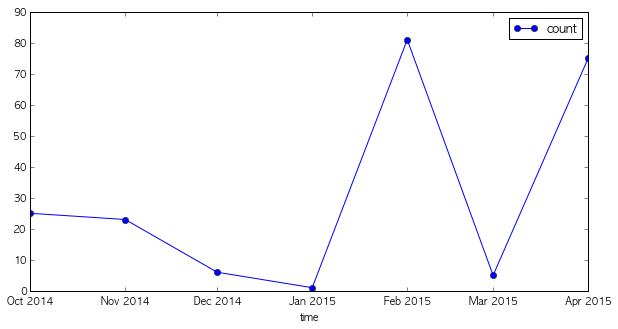

In [74]:
# plot like counts by time
df.plot(x="time", y="count", marker='o', figsize=(10,5))

### 處理中文字顯示問題
`matplotlib`預設可能不認中文字型，需要特別指定給他。

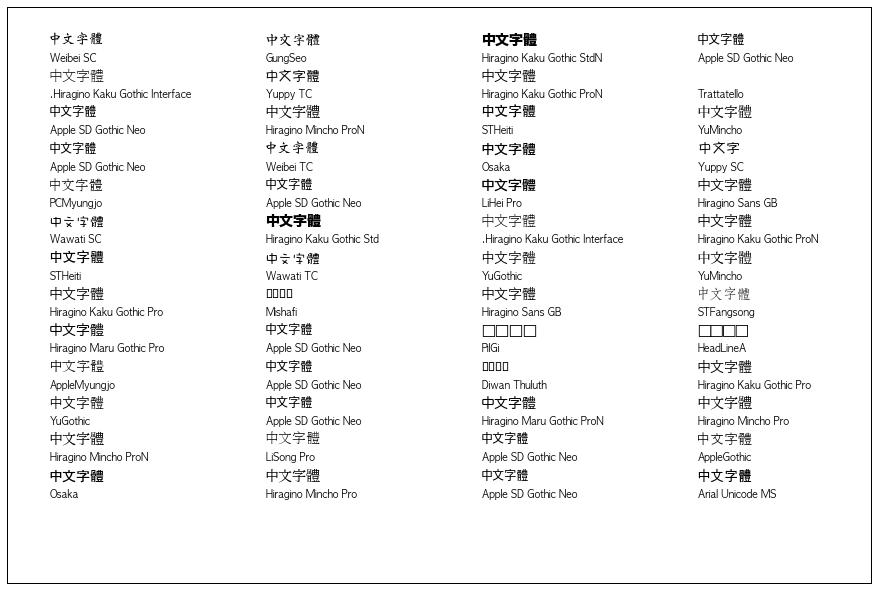

In [75]:
# run the following code to show all available Chinese font family on your computer
from matplotlib.font_manager import fontManager 
import os 
 
fig = plt.figure(figsize=(12,8)) 
ax = fig.add_subplot(111) 
plt.subplots_adjust(0, 0, 1, 1, 0, 0) 
plt.xticks([]) 
plt.yticks([]) 
x, y = 0.05, 0.18 
fonts = [font.name for font in fontManager.ttflist if 
    os.path.exists(font.fname) and os.stat(font.fname).st_size>1e6] 
font = set(fonts) 
dy = (1.0-y)/(len(fonts)/4 + (len(fonts)%4!=0)) 
for font in fonts: 
    t = ax.text(x, y, u"中文字體", {'fontname':font, 'fontsize':14}, transform=ax.transAxes) 
    ax.text(x, y-dy/2, font, transform=ax.transAxes) 
    x += 0.25 
    if x >= 1.0: 
        y += dy 
        x = 0.05 
# plt.show() # not necessary in ipython notebook

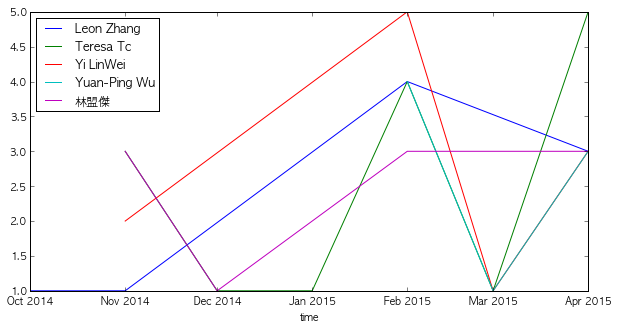

In [76]:
# plot like counts by time by top likers
matplotlib.rc("font", family="AppleGothic") # set any Chinese font family
fig, ax = plt.subplots(1,1)
p = df2_filtered.groupby("liker").plot(x="time", y="count", marker='x', ax=ax, figsize=(10,5))
plt.legend(list(p.axes[0].get_values()), loc="best")

## programmatically get the token?
not covered in this course...

# Regular Expression
## 正規表達式

### what is re?
from wikipedia:
> a regular expression (abbreviated regex or regexp and sometimes called a rational expression) is a sequence of characters that define a search pattern, mainly for use in pattern matching with strings, or string matching, i.e. "find and replace"-like operations.

### why re?
imagine there is a dataset looks like this...
> kyle chung; (02)2256-1116; New Taipei City 
<br>
Mr. Funghi,Earth Anywhere, 07-21180293
<br>
free tel: 0800 000 123 #1234
<br>
2945 1412  street no.123  Dr.A(not Dr.B)

YOUR BOSS: "Give me all the telphone numbers only." 

In [7]:
import re

test_str = ["kyle chung; (02)2256-1116; New Taipei City",
            "Mr. Funghi,Earth Anywhere, 07-21180293",
            "free tel: 0800 000 123 #1234",
            "Dr.A (not Dr.B) street no.123 2945 1412"]

def giveMeTel(pattern, test_str=test_str):
    p = re.compile(pattern)
    for s in test_str:
        m = p.search(s)
        if m:
            print m.group()


In [8]:
# 1st try: get all digits
    
giveMeTel("[0-9]")

0
0
0
1


In [9]:
# 2nd try: get all digits, not just one
    
giveMeTel("[0-9]+")

02
07
0800
123


In [10]:
# 3rd try: get all digits, not just one, and dash
    
giveMeTel("[0-9-]+")

02
07-21180293
0800
123


In [11]:
# 4th try: get all digits, not just one, and dash and paranthesis and blanks...
    
giveMeTel("[0-9-()]+")

(02)2256-1116
07-21180293
0800
(


In [12]:
# now allow blanks, oops!
    
giveMeTel("[0-9-() ]+")

 
 
 
 (


In [13]:
# !(@#$&!@#*$!(@&%(!@*...
    
giveMeTel("\(?[0-9]+\)?")

(02)
07
0800
123


In [14]:
giveMeTel("\(?[0-9]+\)?[0-9-]+")

(02)2256-1116
07-21180293
0800
123


In [15]:
giveMeTel("\(?[0-9]+\)?[0-9-]+")

(02)2256-1116
07-21180293
0800
123


In [16]:
giveMeTel("\(?[0-9]+\)?[0-9- ]+")

(02)2256-1116
07-21180293
0800 000 123 
123 2945 1412


In [17]:
giveMeTel("\(?[0-9]{0,2}\)?-?[0-9]{4}[ -]?[0-9]{4}")

(02)2256-1116
07-21180293
2945 1412


In [18]:
giveMeTel("[0-9]{4}[ ]?[0-9]{3}[ ]?[0-9]{3}")

0800 000 123


In [19]:
giveMeTel("\(?[0-9]{0,2}\)?-?[0-9]{4}[ -]?[0-9]{4}|[0-9]{4}[ ]?[0-9]{3}[ ]?[0-9]{3}")

(02)2256-1116
07-21180293
0800 000 123
2945 1412


In [20]:
giveMeTel("\(?[0-9]{0,2}\)?-?[0-9]{4}[ -]?[0-9]{4}|[0-9]{4}[ ]?[0-9]{3}[ ]?[0-9]{3}[ ]?#?[0-9]+")

(02)2256-1116
07-21180293
0800 000 123 #1234
2945 1412


### components of re
+ characters (string-literals)
    + ABCabc123
+ meta-characters (operators)
    + `. ^ $ * + ? { } [ ] \ | ( )`
+ special sequences (short-cuts)
    + `\d \D \s \S \w \W \b \B`

#### wildcarder: `.`
match anything except newline(`\n`)

#### bounders: `^ $`
+ `^`: (following) the beginning character
    + `^this` matches anything started with "this"
+ `$`: (preceding) the ending character
    + `that$` matches anything ended with "that"

#### repeaters: `* + ?`
to specify the occurrence condition of its previous character
+ `*`: any occurrence (including zero)
+ `+`: at least one occurrence
+ `?`: zero or exactly one occurrence

#### advanced repeaters: `{m,n}`
at least `m` and at most `n` occurrence

example:
+ `a{1,3}`: character "a" must occur at least one and at most three time
+ `a{1,}`: character "a" must occur at least one time
+ `a{,3}`: character "a" must occur at most three time

#### `[]`: character class
+ to specify a set of characters that may occcur
+ most meta-char will lose their speacial meaning within the class
    + `[0-9$]` matches any of numbers 0 to 9 or the dollar sign($)
    + here the bounder meta-char `$` is treated as-is
+ special meaning only triggered within the class:
    + `-`: ranger, e.g., `[0-9a-zA-Z]`
    + `^`: negator, e.g., `[^0-9]`

#### or: `|`
example:
+ `abc|def`: either "abc" or "def"

#### grouper: `()`
example:
+ `(abc)+`: at least one occurrence of "abc"
+ `abc+`: here the repeater `+` only operates on character "c"

#### special sequences
short-cut of specific character classes
+ `\d`: any decimal digit => `[0-9]`
+ `\D`: any non-digit => `[^0-9]`
+ `\s`: any white space => `[ \t\n\r\f\v]`
+ `\S`: any non-white space => `[^ \t\n\r\f\v]`
+ `\w`: any alphanumeric => `[a-zA-Z0-9_]`
+ `\W`: any non-alphanumeric => `[^a-zA-Z0-9_]`
+ `\b`: 

#### escaper: `\`
to have its following character **as-is**, i.e., stripping special meaning

this is required when you want to match literal meta-char

# Regex in Python<span style="color:blue"> | Basic</span>
## 在Python使用正規表達式

### import python re module

In [21]:
import re

### compile a regex

In [22]:
p = re.compile("test+")
# return a pattern object
print p
# check methods
[me for me in dir(p) if callable(getattr(p, me)) and not "__" in me]

['findall', 'finditer', 'match', 'scanner', 'search', 'split', 'sub', 'subn']

#### the `match` method
to perform pattern matching **from the beginning** of a string

In [23]:
print p.match("123")

None


In [24]:
print p.match("123test")

None


In [25]:
print p.match("tes")

None


In [26]:
print p.match("test")

In [27]:
print p.match("testtttt")

#### the `match` object

In [28]:
m = p.match("testtttt")
[me for me in dir(m) if callable(getattr(m, me)) and not "__" in me]

['end', 'expand', 'group', 'groupdict', 'groups', 'span', 'start']

In [29]:
# return the matched string
m.group()

'testtttt'

In [30]:
"the match starts at pos %s and ends at pos %s" % (m.start(), m.end())

'the match starts at pos 0 and ends at pos 8'

In [31]:
"the match starts at pos %s and ends at pos %s" % m.span()

'the match starts at pos 0 and ends at pos 8'

#### the `search` method
to perform pattern matching **from anywhere** of a string

In [32]:
m = p.search("123test456")
if m:
    print "pattern matched at pos %s to pos %s" % m.span()
else:
    print "no match"

pattern matched at pos 3 to pos 7


#### the `findall` and `finditer` method

In [33]:
p = re.compile("\d")
p.findall("24 hours a day; 8 in sleep and 8 for works")

['2', '4', '8', '8']

In [34]:
for m in p.finditer("24 hours a day; 8 in sleep and 8 for works"):
    print "\'%s\' found at %s" % (m.group(), m.span())

'2' found at (0, 1)
'4' found at (1, 2)
'8' found at (16, 17)
'8' found at (31, 32)


### implicit compile
methods like `search`, `match`, and `findall` can be called on module-level

In [35]:
m = re.findall("\d+", "1 round for Daan Park is 2350m")
print m

['1', '2350']


In [36]:
m = re.match("\d+", "1 round for Daan Park is 2350m")
print m.group()

1


In [37]:
m = re.search("\d+", "1 round for Daan Park is 2350m")
print m.group() # notice that only the first matched is returned

1


### more on `group` and `groups` method


In [38]:
m = re.match("([0-9]+)([a-z]+)", "123abc456")
# return the whole matched (sub)string
m.group()

'123abc'

In [39]:
# if grouper is used, they can be retrieved individually
m.group(0), m.group(1), m.group(2)

('123abc', '123', 'abc')

In [40]:
# or multiple retrieved
m.group(1,2,1)

('123', 'abc', '123')

In [41]:
# return each group matched in a tuple (works only if grouper is used)
m.groups() 

('123', 'abc')

In [42]:
# or in a dictionary
m.groupdict()

{}

(see the <a href="#/3">advanced section</a>)

### challenge!
>1 round for Daan Park is 2350m

=> try to retrieve two numbers present in the above sentence. (1 and 2350)

In [43]:
test_str = "1 round for Daan Park is 2350m"

In [44]:
m = re.match("(\d+).*(\d+).*", test_str)
m.groups() # failed to retrieve the second number (what's wrong?)

('1', '0')

In [45]:
m = re.match("(\d+)[^0-9]*(\d+).*", test_str)
m.groups() # repeater is GREEDY: they try to match as many as possible

('1', '2350')

### challenge!
> my code is 12
<br>
Mr. lucky7's code is 76
<br>
are you coded no.1?
<br>

=> retrieve all "code number" in this three lines

In [46]:
test_str = ["my code is 12", 
            "Mr. lucky7's code is 76",
            "are you coded no.1?"]

In [47]:
# hard-coded re
# useless, and sometimes dangerous!
p = re.compile("(12|76|1)")
[ p.search(s).group() for s in test_str ]

['12', '76', '1']

In [48]:
# match the number ended in the sentence, with optionally question mark
# still somewhat problem-specific and hence less general
# also notice that .findall only returns string matched in grouper, 
#     try "(\d+\??)" instead to see the diff
p = re.compile("(\d+)\??$")
[ p.findall(s)[-1] for s in test_str ]

['12', '76', '1']

In [49]:
# match all numbers and return the last one
p = re.compile("\d+")
[ p.findall(s)[-1] for s in test_str ]

['12', '76', '1']

### challenge!
> My name is Kyle Chung, loving buying at PChome.

=> retrieve first-char-capitalized words 

In [50]:
test_str = "My name is Kyle Chung, loving buying at PChome."

In [51]:
# bounder "\b" is essential here
# why double the escaper?
m = re.compile("\\b([A-Z][a-z]+)+")
m.findall(test_str)

['My', 'Kyle', 'Chung']

(see the section <a href="#/4">raw string notation</a> for more info about double escaping) 

### challenge!
> Things are getting HARDER! Now try capturing CamelUpperCased word(s).

=> retrieve any camel-cased word.

In [52]:
test_str = "Things are getting HARDER! Now try capturing CamelUpperCased word(s)."

In [53]:
m = re.compile("\\b[A-Z]+[a-z]+")
m.findall(test_str)

['Things', 'Now', 'Camel']


# Regex in Python<span style="color:blue"> | Advanced</span>
## 進階的正規表達式
regex extensions: `(?<pattern>)`

this section covers four extensions:
+ non-capturer: `(?:<pattern>)`
+ ahead-looker: `(?=<pattern>)` and `(?!<pattern>)`
+ named-grouper: `(?P<gname>)`
+ backreferer: `(?p=<gname>)`

### non-capturer: `(?:...)`
to match without returning matched

In [54]:
test_str = "fact.1: 1 round for Daan Park is 2350m"
m = re.search("(?:^.*: )(\d+)", test_str)
print "string returned by .group: \n\t" + str(m.group())
print "string returned by .groups: \n\t" + str(m.groups())

m = re.search("(^.*:)", test_str)
print m.groups()


string returned by .group: 
	fact.1: 1
string returned by .groups: 
	('1',)
('fact.1:',)


### back to the challenge!

In [55]:
test_str = ["my code is 12", 
            "Mr. lucky7's code is 76",
            "are you coded no.1?"]
p = re.compile("(?:code)[^0-9]*(\d+)")
[ p.search(s).groups() for s in test_str ]

[('12',), ('76',), ('1',)]

### ahead-looker: `(?=...)` and `(?!...)`
only to match when the asserted string is (not) matched first

### named-grouper: `(?P<gname>)`
a python-specific extension


### backreferer: `(?P=gname)`
yet anotehr python-specific extension

### Raw String Notation

# Reference
+ [Facebook official Graph API reference](https://developers.facebook.com/docs/graph-api/reference/)
+ [Python official re tutorial](https://docs.python.org/2/howto/regex.html)
+ [Unix timestamp converter](http://www.epochconverter.com)
+ regex visualizer / tester:
    + [Debuggex](https://www.debuggex.com)
    + [regex101](https://regex101.com/#python)

# Appendix
+ Python function decorator usage

## Python function decorator example

In [1]:
def printArgs(*args):
    for arg in args:
        print arg

printArgs(1,2,3)

1
2
3


In [2]:
# decorator without argument
def decorate(func):
    def wrapper(*args, **kwargs):
        print "decorated!"
        return func(*args, **kwargs)
    return wrapper

@decorate
def printArgs(*args):
    for arg in args:
        print arg

printArgs(1,2,3)

decorated!
1
2
3


In [4]:
# decorator with argument(s)
def decorateWithArg(dname):
    def realWrapper(func):
        def wrapper(*args, **kwargs):
            print "decorated by %s!" % dname
            return func(*args, **kwargs)
        return wrapper
    return realWrapper

@decorateWithArg("test")
def printArgs(*args):
    for arg in args:
        print arg

printArgs(1,2,3)

decorated by test!
1
2
3
